<a href="https://colab.research.google.com/github/mnocerino23/Wildfire-Forecaster/blob/main/Regression_LargeDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As the classification models have had some difficulties classifying the fires accurately, we will attempt to build regression models (on Acres Burned feature) instead and see if these have more success.

I will deploy the following techniques:

1.   One-Hot Encoding of Categorical Variables
2.   Splitting the Training and Testing data
3.   Feature Selection
4.   Normalize Data
5.   Regressions




In [122]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

#Read in the smaller of the final datasets. The dataset contains around 1200 fires from 2016-2019
wildfire_set1 = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/Wildfires/wildfire_set1_w_allfeatures.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [123]:
wildfire_set1.head()

,Unnamed: 0,Year,Name,AcresBurned,Fire Size Rank,Cause,SOURCE_REPORTING_UNIT_NAME,DaysBurn,Discovery Month,Discovered DOY,...,DX90_2M,DP10_2M,Receives Snow,Snow Station,River Basin,Mar_SP,Mar_WC,Mar_Dens,Has_Elevation,Elevation
0,0,2005,FOUNTAIN,0.10,A,Miscellaneous,Plumas National Forest,1.0,Feb,33.0,...,0.0,19.0,1.0,eureka_lake,Feather,79.6,34.0,0.43,1,2965.8432
1,1,2004,PIGEON,0.25,A,Lightning,Eldorado National Forest,1.0,May,133.0,...,0.0,3.0,1.0,ward_creek_2,Lake Tahoe,108.6,38.1,0.35,1,6207.2736
2,2,2004,SLACK,0.10,A,Debris Burning,Eldorado National Forest,1.0,Jun,152.0,...,0.0,11.0,1.0,ward_creek_2,Lake Tahoe,108.6,38.1,0.35,1,3454.6824
3,3,2004,DEER,0.10,A,Lightning,Eldorado National Forest,5.0,Jun,180.0,...,0.0,3.0,1.0,echo_summit,American,87.2,28.4,0.33,1,7759.0920
4,4,2004,STEVENOT,0.10,A,Lightning,Eldorado National Forest,5.0,Jun,180.0,...,0.0,3.0,1.0,echo_summit,American,87.2,28.4,0.33,1,7598.3328


In [124]:
print(wildfire_set1.columns)

Index(['Unnamed: 0', 'Year', 'Name', 'AcresBurned', 'Fire Size Rank', 'Cause',
       'SOURCE_REPORTING_UNIT_NAME', 'DaysBurn', 'Discovery Month',
       'Discovered DOY', 'Contained Month', 'Contained DOY', 'Latitude',
       'Longitude', 'County', 'CountyIds', 'State', 'OWNER_DESCR',
       'NOAA Station', 'Link', 'AWND', 'CLDD', 'DP10', 'DX90', 'PRCP', 'TAVG',
       'TMAX', 'TMIN', 'PRCP_6M', 'PRCP_RS', 'DX90_2M', 'DP10_2M',
       'Receives Snow', 'Snow Station', 'River Basin', 'Mar_SP', 'Mar_WC',
       'Mar_Dens', 'Has_Elevation', 'Elevation'],
      dtype='object')


Drop all columns that will not be relevant for our regression task:Unnamed: 0, Year, Name, Cause, SOURCE_REPORTING UNIT NAME, DaysBurn, Discovered DOY, Contained Month, Contained DOY, Lat, Long, County Ids, State, OWNER_DESCR, NOAA Station, Link, Snow Station, River Basin

In [125]:
wildfire_set1.drop(columns = ['Unnamed: 0', 'Year', 'Name', 'Cause', 'Fire Size Rank',
                      'SOURCE_REPORTING_UNIT_NAME', 'DaysBurn','Contained Month', 'Discovered DOY',
                      'Contained DOY','Latitude','Longitude','County','CountyIds','State','OWNER_DESCR',
                      'NOAA Station', 'Link', 'Snow Station', 'River Basin','Has_Elevation'], inplace = True)

Taking a look at the dataset now that we have dropped the nonrelevant columns

In [126]:
wildfire_set1.head(5)

,AcresBurned,Discovery Month,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,PRCP_RS,DX90_2M,DP10_2M,Receives Snow,Mar_SP,Mar_WC,Mar_Dens,Elevation
0,0.10,Feb,5.6,0.0,12.0,0.0,5.33,38.9,43.9,33.9,27.89,49.06,0.0,19.0,1.0,79.6,34.0,0.43,2965.8432
1,0.25,May,6.9,0.0,2.0,0.0,0.81,47.3,63.0,31.6,14.37,14.76,0.0,3.0,1.0,108.6,38.1,0.35,6207.2736
2,0.10,Jun,5.6,36.0,0.0,0.0,0.00,63.1,70.2,56.0,36.71,40.37,0.0,11.0,1.0,108.6,38.1,0.35,3454.6824
3,0.10,Jun,5.6,0.0,1.0,0.0,0.29,54.7,72.9,36.5,13.63,14.76,0.0,3.0,1.0,87.2,28.4,0.33,7759.0920
4,0.10,Jun,5.6,0.0,1.0,0.0,0.29,54.7,72.9,36.5,13.63,14.76,0.0,3.0,1.0,87.2,28.4,0.33,7598.3328


In [127]:
wildfire_set1.shape

(114558, 19)

# Investigate the presence of null values in the dataset:
Below, we have the count of totall null values in each column for  wildfire_set1.

In [128]:
print(wildfire_set1.isnull().sum())

AcresBurned           0
Discovery Month       0
AWND               6254
CLDD               3335
DP10               3042
DX90               3333
PRCP               3042
TAVG               3335
TMAX               3333
TMIN               3285
PRCP_6M            2470
PRCP_RS            2811
DX90_2M            2215
DP10_2M            1599
Receives Snow       102
Mar_SP              102
Mar_WC              102
Mar_Dens            102
Elevation             0
dtype: int64


In [129]:
wildfire_set1 = wildfire_set1.dropna()

In the cell above, we drop all null values in the dataset. We are able to drop all nulls in this case because our dataset is sizeable with relatively few null values in each so not much data is lost in this process. Looking at the shape of the dataframe after the drops, we see that the dataset remains a similar size post drop.

In [130]:
#we lose around 50 values when dropping NaN's
wildfire_set1.shape

(106024, 19)

# For our regressions, we will try to predict the number of Acres Burned in the fire

In [131]:
print(wildfire_set1.columns)

Index(['AcresBurned', 'Discovery Month', 'AWND', 'CLDD', 'DP10', 'DX90',
       'PRCP', 'TAVG', 'TMAX', 'TMIN', 'PRCP_6M', 'PRCP_RS', 'DX90_2M',
       'DP10_2M', 'Receives Snow', 'Mar_SP', 'Mar_WC', 'Mar_Dens',
       'Elevation'],
      dtype='object')


Double check our datatypes before we proceed with preprocessing and model building. As we can see, all features besides discovery and fire size rank are numerical (of type float or int) so all we have to do is one hot encode the discovery month of the fire.

In [132]:
wildfire_set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106024 entries, 0 to 114557
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AcresBurned      106024 non-null  float64
 1   Discovery Month  106024 non-null  object 
 2   AWND             106024 non-null  float64
 3   CLDD             106024 non-null  float64
 4   DP10             106024 non-null  float64
 5   DX90             106024 non-null  float64
 6   PRCP             106024 non-null  float64
 7   TAVG             106024 non-null  float64
 8   TMAX             106024 non-null  float64
 9   TMIN             106024 non-null  float64
 10  PRCP_6M          106024 non-null  float64
 11  PRCP_RS          106024 non-null  float64
 12  DX90_2M          106024 non-null  float64
 13  DP10_2M          106024 non-null  float64
 14  Receives Snow    106024 non-null  float64
 15  Mar_SP           106024 non-null  float64
 16  Mar_WC           106024 non-null  floa

# Below we use the describe function to get a general outlook on mean, max, min, and percentiles for each of the numerical features in the dataset

In [133]:
wildfire_set1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AcresBurned,106024.0,79.390867,2456.308820,0.0010,0.1000,0.2500,1.0000,315578.8000
AWND,106024.0,6.294384,1.875589,0.4000,4.9000,6.0000,7.4000,17.2000
CLDD,106024.0,224.058279,215.023594,0.0000,19.0000,180.0000,377.0000,1113.0000
DP10,106024.0,0.940853,1.810402,0.0000,0.0000,0.0000,1.0000,24.0000
DX90,106024.0,12.191391,11.505412,0.0000,0.0000,9.0000,23.0000,31.0000
PRCP,106024.0,0.457943,1.135417,0.0000,0.0000,0.0400,0.4100,33.7000
TAVG,106024.0,69.135184,10.958172,18.3000,61.4000,70.4000,77.4000,100.9000
TMAX,106024.0,83.236084,13.094602,33.0000,73.8000,85.1000,93.8000,114.3000
TMIN,106024.0,55.033364,9.797339,3.7000,49.0000,55.8000,61.8000,89.0000
PRCP_6M,106024.0,9.410894,9.301400,0.0000,2.8700,6.5900,12.9100,85.9100


# Some Interesting Takeaways:
*   Acres Burned has an average of 5200 acres yet the 50th percentile fire only has 87 acres burned. This tells us there are some extremely massive fires in this dataset contributing to this large mean acres burned
*   DP10 and PRCP look to not be the best distinguishing features as 0-50th percentile for both all have 0. This can be attributed to the vast majority of the state of California having undergone extreme drought conditions during the last decade (with some exceptions in rainy coastal areas in Northern California)
*  The temperature features seem to have a wide spread which is good
*  Three of our engineered weather features DX90_2M, PRCP_6M, PRCP_RS seem to have a healthy spread and diverse values which is good
*   Average Elevation that fires in the dataset occurred at is 1760 ft. with 75% occuring under 2398 ft. Interesting to see that most fires begin at lower elevations







# One-Hot Encoding Categorical Variables


*   Encode the discovery month (the only categorical variable) in both datasets



In [134]:
#Add the dummy columns to the dataset
dummy_month = pd.get_dummies(wildfire_set1['Discovery Month'])
wildfire_set1 = pd.merge(left = wildfire_set1, right = dummy_month, left_index = True, right_index = True)
wildfire_set1 = wildfire_set1.drop(columns = ['Discovery Month'])
wildfire_set1.head(10)

,AcresBurned,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0.10,5.6,0.0,12.0,0.0,5.33,38.9,43.9,33.9,27.89,...,0,1,0,0,0,0,0,0,0,0
1,0.25,6.9,0.0,2.0,0.0,0.81,47.3,63.0,31.6,14.37,...,0,0,0,0,0,0,1,0,0,0
2,0.10,5.6,36.0,0.0,0.0,0.00,63.1,70.2,56.0,36.71,...,0,0,0,0,1,0,0,0,0,0
3,0.10,5.6,0.0,1.0,0.0,0.29,54.7,72.9,36.5,13.63,...,0,0,0,0,1,0,0,0,0,0
4,0.10,5.6,0.0,1.0,0.0,0.29,54.7,72.9,36.5,13.63,...,0,0,0,0,1,0,0,0,0,0
5,0.10,5.1,1.0,0.0,0.0,0.00,61.1,79.8,42.3,8.31,...,0,0,0,1,0,0,0,0,0,0
6,0.10,5.1,1.0,0.0,0.0,0.00,61.1,79.8,42.3,8.31,...,0,0,0,1,0,0,0,0,0,0
7,0.80,6.5,7.0,9.0,0.0,4.99,55.5,67.0,44.0,25.91,...,0,0,0,0,0,1,0,0,0,0
8,1.00,6.5,7.0,9.0,0.0,4.99,55.5,67.0,44.0,25.91,...,0,0,0,0,0,1,0,0,0,0
9,0.10,5.1,1.0,0.0,0.0,0.00,61.1,79.8,42.3,8.31,...,0,0,0,1,0,0,0,0,0,0


In [135]:
#Radomly Shuffle the dataframe to get rid of any pre-existing organization based on size
wildfire_set1 = wildfire_set1.sample(frac=1).reset_index(drop=True)

In [136]:
wildfire_set1.head()

,AcresBurned,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0.10,5.1,227.0,0.0,2.0,0.00,71.9,79.8,63.9,10.23,...,0,0,0,0,0,0,0,0,0,0
1,0.20,4.9,0.0,1.0,0.0,0.33,55.3,74.7,35.9,2.09,...,0,0,0,0,0,0,0,0,0,1
2,0.20,5.4,616.0,0.0,31.0,0.05,84.8,102.2,67.5,17.87,...,0,0,0,1,0,0,0,0,0,0
3,1.25,5.6,39.0,2.0,4.0,0.72,58.5,72.9,44.2,18.53,...,0,0,0,0,0,0,0,0,0,0
4,0.30,4.9,322.0,1.0,20.0,0.49,75.7,91.5,60.0,6.55,...,0,0,0,0,0,0,0,0,0,1


In [137]:
#Write the clean, encoded, and randomly shuffled data to csv before continuing 
wildfire_set1.to_csv('wildfire1_regression_clean.csv')

Split the data into train-test sets

In [138]:
#We will train our models using the more recent dataset

In [139]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

Utilize an 80-20 train test split on our large dataset

In [141]:
train_data, test_data = train_test_split(wildfire_set1, test_size = 0.2, random_state = 1)

Print the shape of training and testing datasets after the split to make sure we have done this correctly

In [142]:
print(train_data.shape)
print(test_data.shape)

(84819, 30)
(21205, 30)


# Feature Selection

In [143]:
from sklearn import linear_model

In [144]:
from sklearn.feature_selection import SelectKBest, f_regression

In [145]:
top_features_ordered = []

In [146]:
train_target = train_data['AcresBurned']
train_features = train_data.drop(columns = ['AcresBurned'])

In [147]:
test_target = test_data['AcresBurned']
test_features = test_data.drop(columns = ['AcresBurned'])

Select the 6 best features using sklearn's SelectKBest (leads to lowest MAE)

In [148]:
best_features = SelectKBest(f_regression, k=6)
k_best_data = best_features.fit_transform(train_features, train_target)
mask = best_features.get_support()
new_features = train_features.columns[mask]
for item in new_features:
  if item not in top_features_ordered:
    top_features_ordered.append(item)

In [149]:
count = 1
for item in top_features_ordered:
  print(count, '. ', item)
  count += 1

1 .  DP10
2 .  PRCP
3 .  TMIN
4 .  DP10_2M
5 .  Elevation
6 .  May


# Now we normalize the train and test sets independently

In [150]:
train_data_selected_X = train_features[top_features_ordered]
train_data_y = train_target

test_data_selected_X = test_features[top_features_ordered]
test_data_y = test_target

In [151]:
print('Train Features:')
print('train_data_X dimensions: ', train_data_selected_X.shape)
print('train_data_y dimensions:', train_data_y.shape, '\n')

print('Test Features:')
print('test_data_X dimensions: ', test_data_selected_X.shape)
print('test_data_y dimensions:', test_data_y.shape, '\n')

Train Features:
train_data_X dimensions:  (84819, 6)
train_data_y dimensions: (84819,) 

Test Features:
test_data_X dimensions:  (21205, 6)
test_data_y dimensions: (21205,) 



Normalize data using min-max-scalar (every feature will normalized so that range of values is 0-1) after splitting into train and test

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
#utilize minmax scaler normalization
scaler = MinMaxScaler()

#Normalize the train, validate, and test independently after splitting
train_data_X = scaler.fit_transform(train_data_selected_X)
#train_target = scaler(train_target)

test_data_X = scaler.fit_transform(test_data_selected_X)
#train_target = scaler(test_target)

# Fit the model using our normalized features to predict Acres Burned

In [154]:
multivariate_regression = linear_model.LinearRegression()
multivariate_regression.fit(train_data_X, train_data_y)

LinearRegression()

Model coefficients: (Beta's)

In [155]:
multivariate_regression.coef_

array([-117.65851164,  -70.88946277,   67.36741474, -202.80882786,
        222.26928684,  -36.11012713])

Model intercept:

In [156]:
multivariate_regression.intercept_

27.964751185174407

In [157]:
from sklearn import metrics
import numpy as np

In [158]:
y_predicted = multivariate_regression.predict(test_data_X)

In [159]:
print('Mean Squared Error: ', metrics.mean_squared_error(test_data_y, y_predicted), '\n')
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_data_y, y_predicted), '\n')
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(test_data_y, y_predicted)))

Mean Squared Error:  5016393.899297369 

Mean Absolute Error:  150.37781667721984 

Root Mean Squared Error:  2239.7307649129098


Note: The multivariate linear regression performs MUCH better on the large dataset with a MAE of 142 acres vs. that of 137 acres when trained on the small dataset

Now, test this model on our second dataset to see if it generalizes well

In [160]:
wildfire_set2 = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/Wildfires/wildfire_set2_w_allfeatures.csv')

In [161]:
print(wildfire_set2.columns)

Index(['Unnamed: 0', 'Year', 'Name', 'AcresBurned', 'Fire Size Rank', 'Cause',
       'SOURCE_REPORTING_UNIT_NAME', 'DaysBurn', 'Discovery Month',
       'Discovered DOY', 'Contained Month', 'Contained DOY', 'Latitude',
       'Longitude', 'County', 'CountyIds', 'State', 'OWNER_DESCR',
       'NOAA Station', 'Link', 'AWND', 'CLDD', 'DP10', 'DX90', 'PRCP', 'TAVG',
       'TMAX', 'TMIN', 'PRCP_6M', 'PRCP_RS', 'DX90_2M', 'DP10_2M',
       'Receives Snow', 'Snow Station', 'River Basin', 'Mar_SP', 'Mar_WC',
       'Mar_Dens', 'Has_Elevation', 'Elevation'],
      dtype='object')


In [162]:
wildfire_set2.drop(columns = ['Unnamed: 0', 'Year', 'Name', 'Cause', 'Fire Size Rank',
                      'SOURCE_REPORTING_UNIT_NAME', 'DaysBurn','Contained Month', 'Discovered DOY',
                      'Contained DOY','Latitude','Longitude','County','CountyIds','State','OWNER_DESCR',
                      'NOAA Station', 'Link', 'Snow Station', 'River Basin','Has_Elevation'], inplace = True)

In [163]:
wildfire_set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AcresBurned      1153 non-null   float64
 1   Discovery Month  1156 non-null   object 
 2   AWND             1119 non-null   float64
 3   CLDD             1119 non-null   float64
 4   DP10             1124 non-null   float64
 5   DX90             1122 non-null   float64
 6   PRCP             1124 non-null   float64
 7   TAVG             1119 non-null   float64
 8   TMAX             1122 non-null   float64
 9   TMIN             1119 non-null   float64
 10  PRCP_6M          1149 non-null   float64
 11  PRCP_RS          1146 non-null   float64
 12  DX90_2M          1154 non-null   float64
 13  DP10_2M          1155 non-null   float64
 14  Receives Snow    1156 non-null   int64  
 15  Mar_SP           1156 non-null   float64
 16  Mar_WC           1156 non-null   float64
 17  Mar_Dens      

In [164]:
wildfire_set2 = wildfire_set2.dropna()

In [165]:
dummy_month = pd.get_dummies(wildfire_set2['Discovery Month'])
wildfire_set2 = pd.merge(left = wildfire_set2, right = dummy_month, left_index = True, right_index = True)
wildfire_set2 = wildfire_set2.drop(columns = ['Discovery Month'])
wildfire_set2.head(10)

,AcresBurned,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,132127.0,6.5,0.0,0.0,0.0,0.00,58.8,65.2,52.4,14.11,...,0,0,0,1,0,0,0,0,0,0
1,48019.0,6.7,529.0,0.0,22.0,0.00,82.6,96.6,68.6,4.68,...,0,0,0,0,1,0,0,0,0,0
2,46344.0,6.9,237.0,0.0,23.0,0.00,72.6,92.6,52.6,2.52,...,0,0,0,0,0,0,0,0,0,0
3,36274.0,6.5,455.0,0.0,28.0,0.00,79.7,94.6,64.7,3.41,...,0,0,0,0,0,0,0,0,0,0
4,33867.0,4.5,0.0,0.0,0.0,0.02,56.4,62.9,49.9,18.03,...,0,0,0,0,0,0,0,0,0,0
5,29322.0,6.0,629.0,0.0,31.0,0.00,85.3,99.2,71.4,2.15,...,0,0,0,0,0,0,0,0,0,0
6,12518.0,6.3,53.0,0.0,3.0,0.00,64.1,76.2,52.0,3.84,...,0,0,0,0,0,0,0,0,0,1
7,8110.0,6.5,455.0,0.0,28.0,0.00,79.7,94.6,64.7,3.41,...,0,0,0,0,0,0,0,0,0,0
8,7609.0,8.3,216.0,0.0,18.0,0.00,71.2,91.5,50.9,7.63,...,0,0,0,0,1,0,0,0,0,0
9,7474.0,5.6,19.0,0.0,0.0,0.01,63.1,71.0,55.3,9.62,...,0,0,0,0,1,0,0,0,0,0


In [166]:
test2_target = wildfire_set2['AcresBurned']
test2_features = wildfire_set2.drop(columns = ['AcresBurned'])

In [167]:
test2_data_selected_X = test2_features[top_features_ordered]
test2_data_y = test2_target

In [168]:
print('Test 2 Features:')
print('test_data_X dimensions: ', test2_data_selected_X.shape)
print('test_data_y dimensions:', test2_data_y.shape, '\n')

Test 2 Features:
test_data_X dimensions:  (1105, 6)
test_data_y dimensions: (1105,) 



In [169]:
test2_data_X = scaler.fit_transform(test2_data_selected_X)
#train_target = scaler(test_target)

In [170]:
y_predicted2 = multivariate_regression.predict(test2_data_X)

In [171]:
print('Mean Squared Error: ', metrics.mean_squared_error(test2_data_y, y_predicted2), '\n')
print('Mean Absolute Error: ', metrics.mean_absolute_error(test2_data_y, y_predicted2), '\n')
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(test2_data_y, y_predicted2)))

Mean Squared Error:  1003861853.1779767 

Mean Absolute Error:  5171.99173715242 

Root Mean Squared Error:  31683.77902299498


Try Ridge and Lasso Regressions to see if these outperform standard multivariate linear regression:

# Ridge Regression:

In [172]:
from sklearn.linear_model import Ridge

In [173]:
ridge_regression = Ridge(alpha = 150)
ridge_regression.fit(train_data_X, train_data_y)

Ridge(alpha=150)

In [174]:
ridge_regression.coef_

array([-104.28840989,  -44.25466757,   71.34567497, -183.11653553,
        208.71609905,  -37.8840907 ])

In [175]:
ridge_regression.intercept_

25.604524985134013

In [176]:
y_predicted = ridge_regression.predict(test_data_X)

# MAE for Ridge Regression is slightly lower

In [177]:
print('Mean Squared Error: ', metrics.mean_squared_error(test_data_y, y_predicted), '\n')
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_data_y, y_predicted), '\n')
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(test_data_y, y_predicted)))

Mean Squared Error:  5016307.662354434 

Mean Absolute Error:  148.90233118864955 

Root Mean Squared Error:  2239.711513198616


# Lasso Regression:

In [178]:
from sklearn.linear_model import Lasso

In [179]:
lasso_regression = Lasso(alpha = 1.5)
lasso_regression.fit(train_data_X, train_data_y)

Lasso(alpha=1.5)

In [180]:
lasso_regression.coef_

array([  -0.        ,   -0.        ,   17.6403265 , -149.56322524,
        170.4415365 ,  -29.91057196])

In [181]:
lasso_regression.intercept_

56.30639670544453

In [182]:
y_predicted = lasso_regression.predict(test_data_X)

In [183]:
print('Mean Squared Error: ', metrics.mean_squared_error(test_data_y, y_predicted), '\n')
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_data_y, y_predicted), '\n')
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(test_data_y, y_predicted)))

Mean Squared Error:  5016345.93656785 

Mean Absolute Error:  148.28017823537246 

Root Mean Squared Error:  2239.720057633956


#Deep Neural Network Regressor (using 6 best features):

In [184]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

In [185]:
print('Train Features:')
print('train_data_X dimensions: ', train_data_selected_X.shape)
print('train_data_y dimensions:', train_data_y.shape, '\n')

print('Test Features:')
print('test_data_X dimensions: ', test_data_selected_X.shape)
print('test_data_y dimensions:', test_data_y.shape, '\n')

Train Features:
train_data_X dimensions:  (84819, 6)
train_data_y dimensions: (84819,) 

Test Features:
test_data_X dimensions:  (21205, 6)
test_data_y dimensions: (21205,) 



# Neural Network Regressor #1:

In [187]:
tf.random.set_seed(5)

network1 = tf.keras.models.Sequential()
network1.add(tf.keras.Input(shape=(6,)))
network1.add(tf.keras.layers.Dense(15, activation='relu'))
network1.add(tf.keras.layers.Dense(15, activation='tanh'))
network1.add(tf.keras.layers.Dense(15, activation='relu'))
network1.add(tf.keras.layers.Dense(1))

network1.compile(
   loss=tf.keras.losses.MeanAbsoluteError(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics='mean_absolute_error')

history1 = network1.fit(train_data_X, train_data_y, epochs=10,validation_data=(test_data_X,test_data_y))

Epoch 1/10
2651/2651 [==============================] - 16s 5ms/step - loss: 81.2104 - mean_absolute_error: 81.2104 - val_loss: 71.5364 - val_mean_absolute_error: 71.5364
Epoch 2/10
2651/2651 [==============================] - 10s 4ms/step - loss: 81.2084 - mean_absolute_error: 81.2084 - val_loss: 71.5385 - val_mean_absolute_error: 71.5385
Epoch 3/10
2651/2651 [==============================] - 6s 2ms/step - loss: 81.2076 - mean_absolute_error: 81.2076 - val_loss: 71.5333 - val_mean_absolute_error: 71.5333
Epoch 4/10
2651/2651 [==============================] - 5s 2ms/step - loss: 81.2068 - mean_absolute_error: 81.2068 - val_loss: 71.5337 - val_mean_absolute_error: 71.5337
Epoch 5/10
2651/2651 [==============================] - 6s 2ms/step - loss: 81.2064 - mean_absolute_error: 81.2064 - val_loss: 71.5332 - val_mean_absolute_error: 71.5332
Epoch 6/10
2651/2651 [==============================] - 6s 2ms/step - loss: 81.2060 - mean_absolute_error: 81.2060 - val_loss: 71.5319 - val_mean_ab

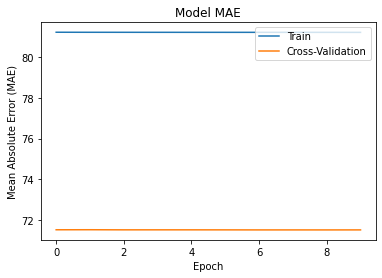

In [188]:
from matplotlib import pyplot as plt
plt.plot(history1.history['mean_absolute_error'])
plt.plot(history1.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

# Neural Network Regressor #2:

In [189]:
tf.random.set_seed(5)

network = tf.keras.models.Sequential()
network.add(tf.keras.Input(shape=(6,)))
network.add(tf.keras.layers.Dense(8, activation='relu'))
network.add(tf.keras.layers.Dense(8, activation='tanh'))
network.add(tf.keras.layers.Dense(8, activation='relu'))
network.add(tf.keras.layers.Dense(1))

network.compile(
   loss=tf.keras.losses.MeanAbsoluteError(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics='mean_absolute_error')

history = network.fit(train_data_X, train_data_y, epochs=10,validation_data=(test_data_X,test_data_y))

Epoch 1/10
2651/2651 [==============================] - 6s 2ms/step - loss: 81.2112 - mean_absolute_error: 81.2112 - val_loss: 71.5348 - val_mean_absolute_error: 71.5348
Epoch 2/10
2651/2651 [==============================] - 6s 2ms/step - loss: 81.2082 - mean_absolute_error: 81.2082 - val_loss: 71.5344 - val_mean_absolute_error: 71.5344
Epoch 3/10
2651/2651 [==============================] - 5s 2ms/step - loss: 81.2077 - mean_absolute_error: 81.2077 - val_loss: 71.5329 - val_mean_absolute_error: 71.5329
Epoch 4/10
2651/2651 [==============================] - 6s 2ms/step - loss: 81.2069 - mean_absolute_error: 81.2069 - val_loss: 71.5326 - val_mean_absolute_error: 71.5326
Epoch 5/10
2651/2651 [==============================] - 5s 2ms/step - loss: 81.2062 - mean_absolute_error: 81.2062 - val_loss: 71.5335 - val_mean_absolute_error: 71.5335
Epoch 6/10
2651/2651 [==============================] - 6s 2ms/step - loss: 81.2059 - mean_absolute_error: 81.2059 - val_loss: 71.5321 - val_mean_abso

I'm a little confused as this model does not learn at all. However, it performs very well

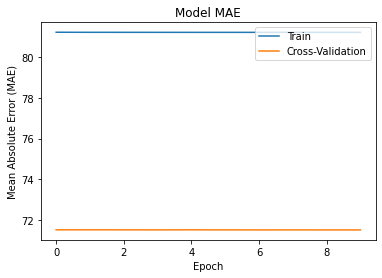

In [190]:
from matplotlib import pyplot as plt
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

I experimented with different layers, activation functions, and but all gave pretty much identical results. They all perform well but models are not learning at all.

In [191]:
tf.random.set_seed(5)

network2 = tf.keras.models.Sequential()
network2.add(tf.keras.Input(shape=(6,)))
network2.add(tf.keras.layers.Dense(20, activation='relu'))
network2.add(tf.keras.layers.Dense(1))

network2.compile(
   loss=tf.keras.losses.MeanAbsoluteError(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics='mean_absolute_error')

history2 = network2.fit(train_data_X, train_data_y, epochs=10,validation_data=(test_data_X,test_data_y))

Epoch 1/10
2651/2651 [==============================] - 5s 2ms/step - loss: 81.2148 - mean_absolute_error: 81.2148 - val_loss: 71.5355 - val_mean_absolute_error: 71.5355
Epoch 2/10
2651/2651 [==============================] - 5s 2ms/step - loss: 81.2089 - mean_absolute_error: 81.2089 - val_loss: 71.5346 - val_mean_absolute_error: 71.5346
Epoch 3/10
2651/2651 [==============================] - 5s 2ms/step - loss: 81.2084 - mean_absolute_error: 81.2084 - val_loss: 71.5341 - val_mean_absolute_error: 71.5341
Epoch 4/10
2651/2651 [==============================] - 5s 2ms/step - loss: 81.2081 - mean_absolute_error: 81.2081 - val_loss: 71.5347 - val_mean_absolute_error: 71.5347
Epoch 5/10
2651/2651 [==============================] - 5s 2ms/step - loss: 81.2080 - mean_absolute_error: 81.2080 - val_loss: 71.5337 - val_mean_absolute_error: 71.5337
Epoch 6/10
2651/2651 [==============================] - 5s 2ms/step - loss: 81.2079 - mean_absolute_error: 81.2079 - val_loss: 71.5333 - val_mean_abso

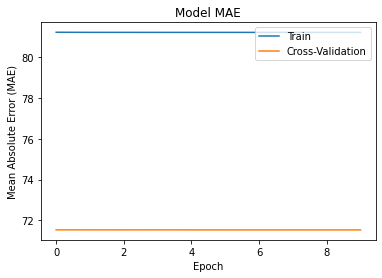

In [192]:
from matplotlib import pyplot as plt
plt.plot(history2.history['mean_absolute_error'])
plt.plot(history2.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()